# **[Hands On] (HO4) - Método Não Hierárquico**

Realização do exercício Hands on 04, com a seguinte descrição "Você é um analista de dados em uma ONG humanitária internacional que arrecadou cerca de R$ 100 bilhões para auxiliar países em necessidade. O CEO da ONG precisa decidir como usar esses fundos de forma estratégica e eficaz, priorizando os países mais necessitados. Sua tarefa é realizar uma análise de classificação dos países com base em fatores socioeconômicos e de saúde, determinando o desenvolvimento geral das nações."

Time 3
Grupo: John Wesley, Fábio Dantas, Rogério Fernandes, Felipe Barbosa

# **Importação das bibliotecas:**

In [ ]:
pip install pycountry

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pycountry
import plotly.express as px

# **Carregamento e Pré-processamento dos Dados:**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/country_data.csv")
df_country = pd.read_csv("https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/country_data.csv")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Traduzindo as colunas**

In [ ]:
# Dicionário com as traduções
traducoes = {
    "country": "Pais",
    "child_mort": "Mortalidade Infantil",
    "exports": "Exportacoes",
    "health": "Gasto com Saude per capita",
    "imports": "Importações",
    "income": "Renda per capita",
    "inflation": "Inflacao",
    "life_expec": "Expectativa de Vida",
    "total_fer": "Taxa de Fertilidade",
    "gdpp": "PIB"
}

# Substituindo os nomes das colunas
df.columns = [traducoes.get(col, col) for col in df.columns]

# Exibindo as colunas traduzidas
df.columns


Index(['Pais', 'Mortalidade Infantil', 'Exportacoes',
       'Gasto com Saude per capita', 'Importações', 'Renda per capita',
       'Inflacao', 'Expectativa de Vida', 'Taxa de Fertilidade', 'PIB'],
      dtype='object')

**Verificando valores ausentes**

In [ ]:
print(df.isnull().sum())

Pais                          0
Mortalidade Infantil          0
Exportacoes                   0
Gasto com Saude per capita    0
Importações                   0
Renda per capita              0
Inflacao                      0
Expectativa de Vida           0
Taxa de Fertilidade           0
PIB                           0
dtype: int64


O DataFrame não possui valores ausentes

**Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pais                        167 non-null    object 
 1   Mortalidade Infantil        167 non-null    float64
 2   Exportacoes                 167 non-null    float64
 3   Gasto com Saude per capita  167 non-null    float64
 4   Importações                 167 non-null    float64
 5   Renda per capita            167 non-null    int64  
 6   Inflacao                    167 non-null    float64
 7   Expectativa de Vida         167 non-null    float64
 8   Taxa de Fertilidade         167 non-null    float64
 9   PIB                         167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,Mortalidade Infantil,Exportacoes,Gasto com Saude per capita,Importações,Renda per capita,Inflacao,Expectativa de Vida,Taxa de Fertilidade,PIB
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.head(1)

,Pais,Mortalidade Infantil,Exportacoes,Gasto com Saude per capita,Importações,Renda per capita,Inflacao,Expectativa de Vida,Taxa de Fertilidade,PIB
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


# **Aplicando o Kmeans**

Dropando a coluna país

In [ ]:
from sklearn.preprocessing import StandardScaler


#Dropando o atributo País
df = df.drop(labels=['Pais'], axis=1)

In [ ]:
features = ['Mortalidade Infantil', 'Renda per capita', 'Expectativa de Vida', 'Gasto com Saude per capita']

Aplicação do algoritmo visto em sala de aula

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

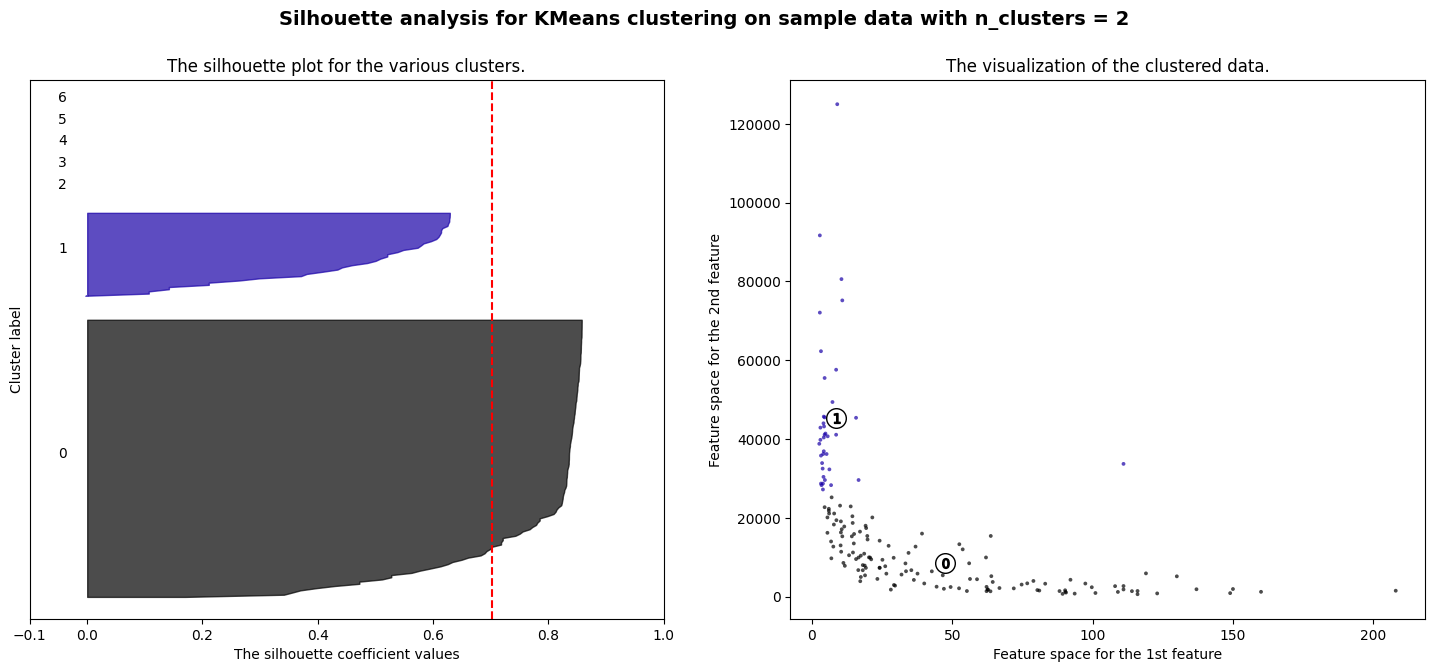

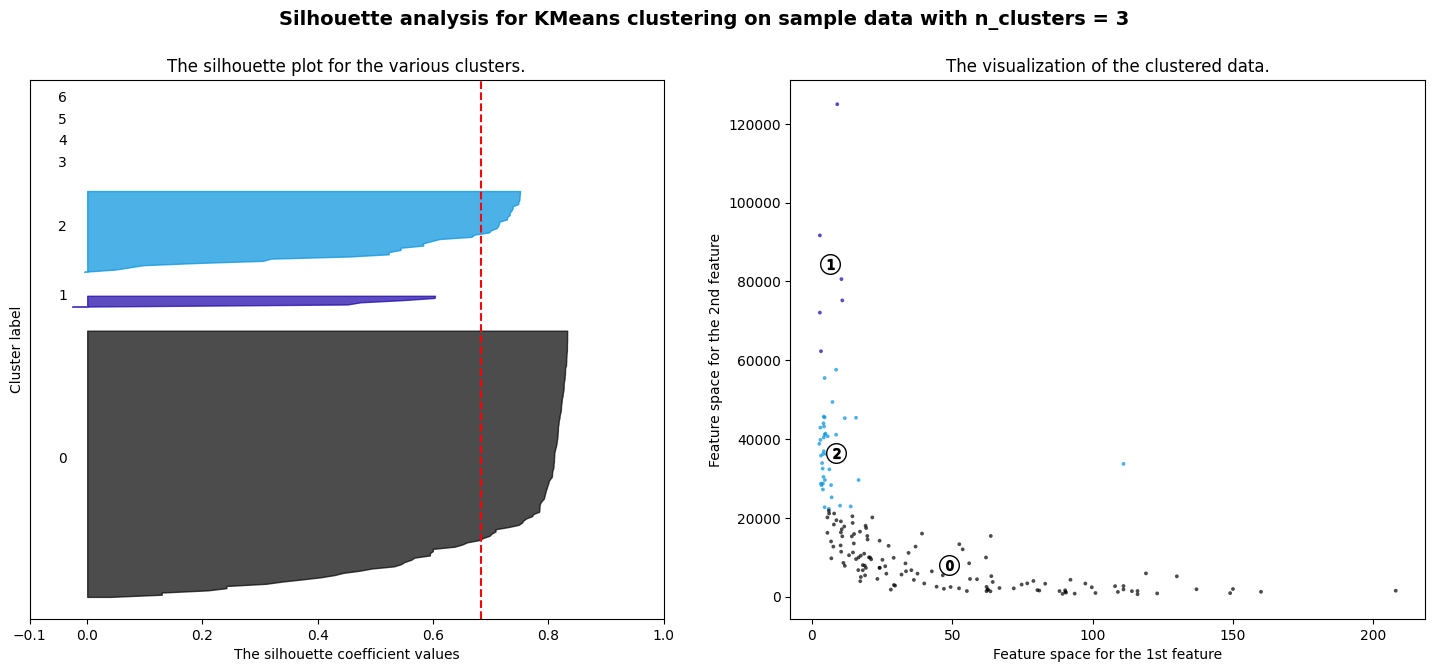

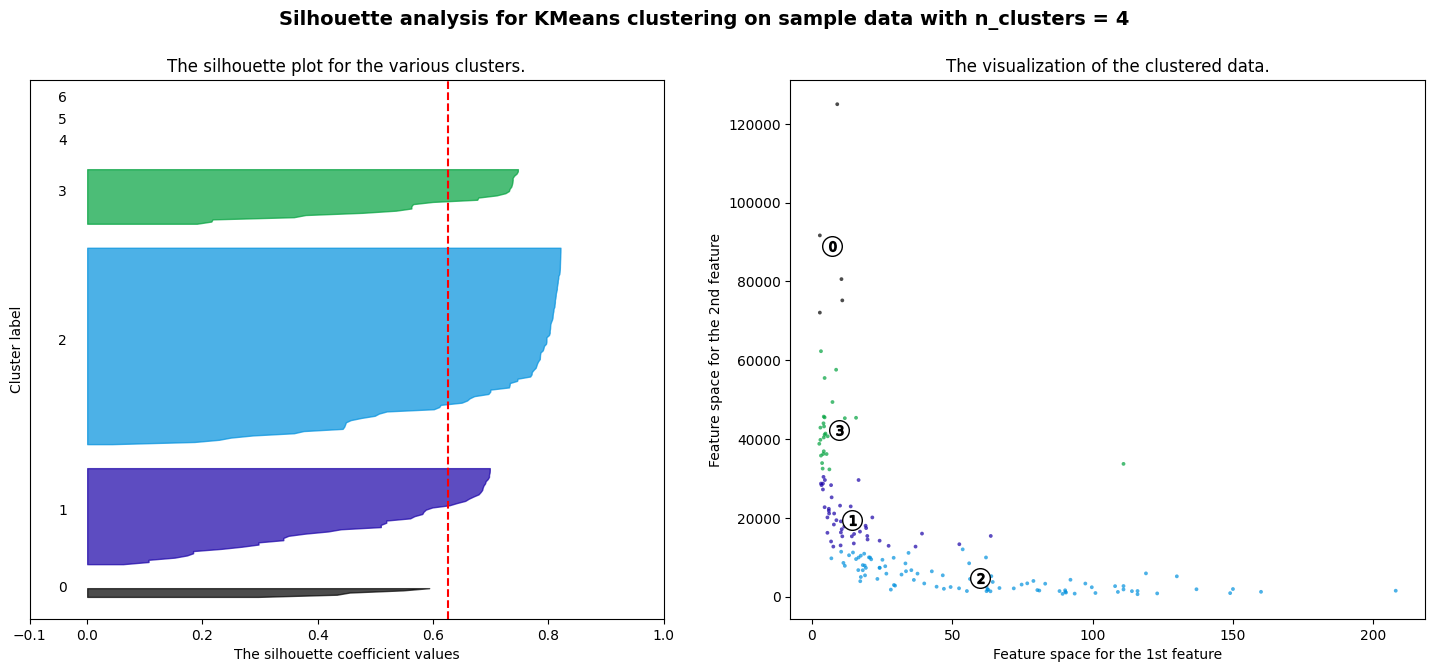

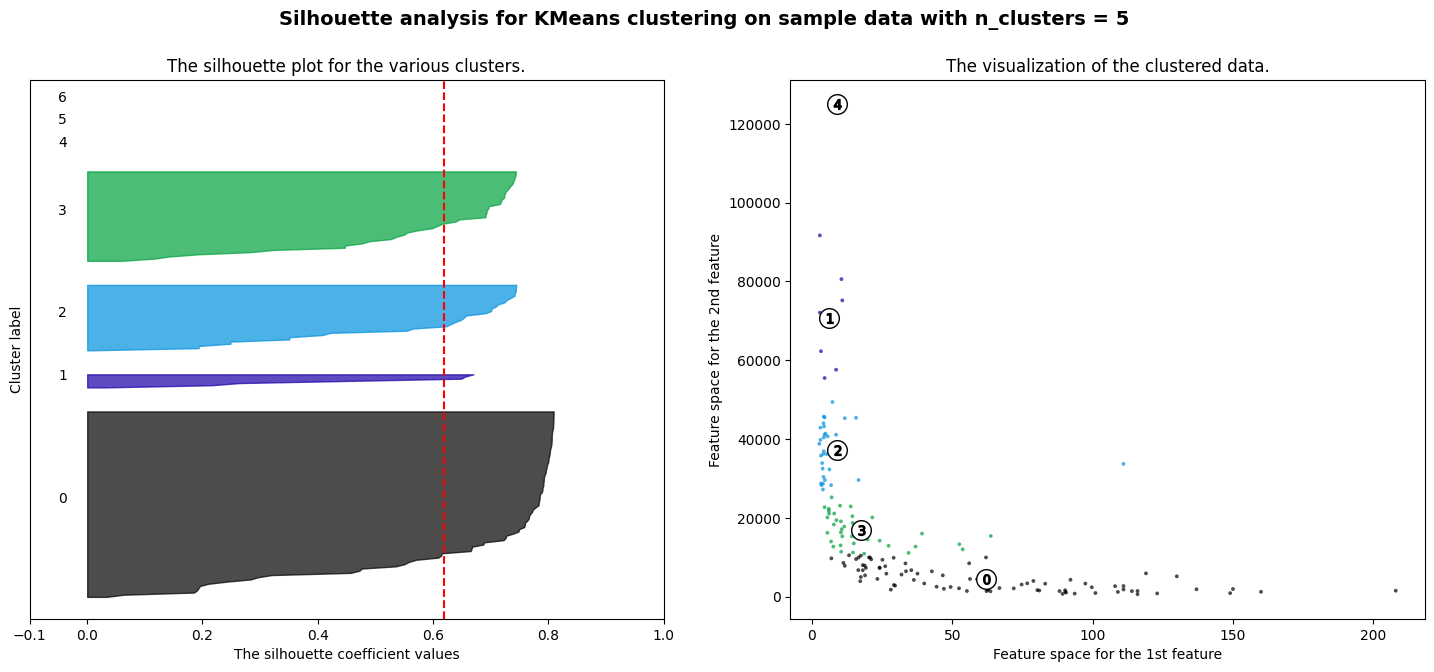

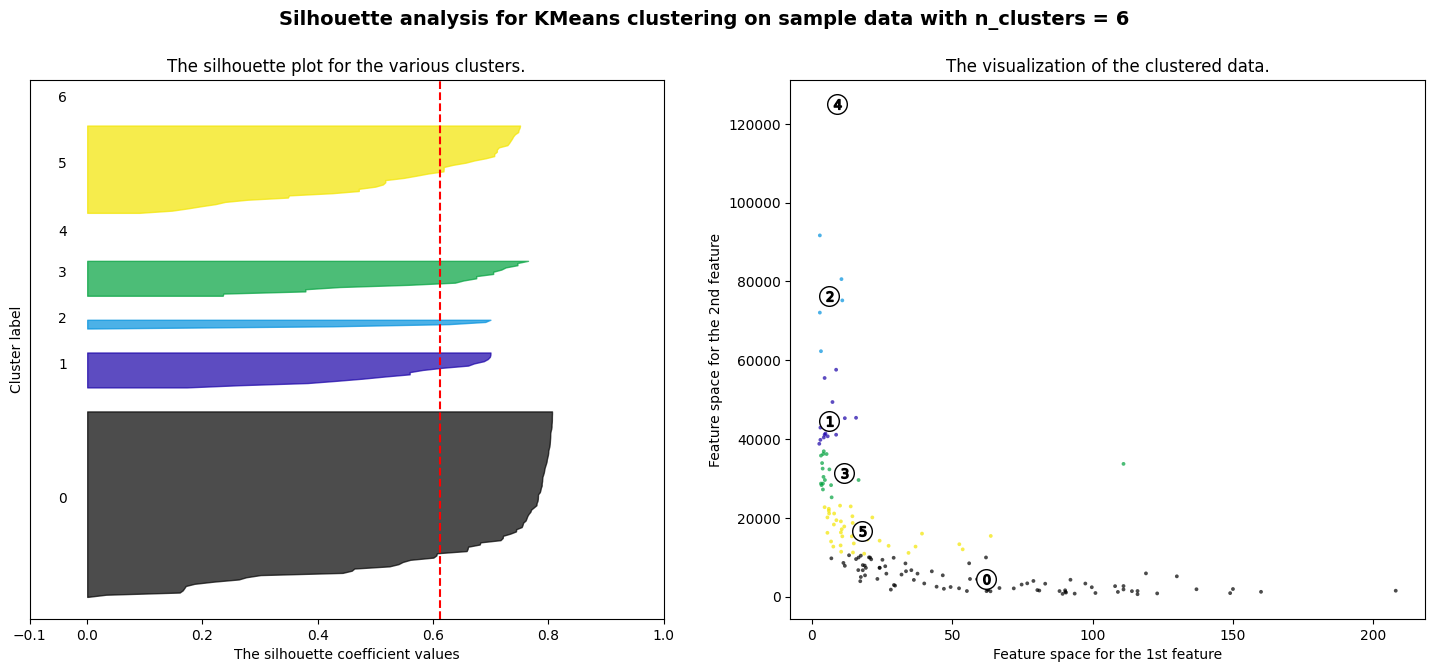

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Escolhendo o número de clusters usando o método do cotovelo (elbow method)
n_clusters = 7
inertia = []
silhouettes = []
clusters = range(2, n_clusters)

X = df[features].copy()

for k in clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)

    labels = kmeans.predict(X)
    silh = silhouette_score(X, labels)

    silhouettes.append(silh)
    inertia.append(kmeans.inertia_)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silh, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)

    d2_data = X[['Mortalidade Infantil', 'Renda per capita']].values
    ax2.scatter(
        d2_data[:, 0], d2_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )

**Método de cotovelo**

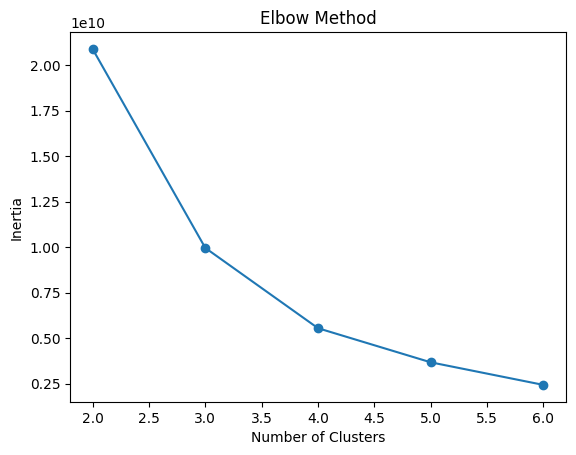

In [ ]:
plt.plot(clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

**Como visto em sala, vamos analisar o comportamento do nosso cluster ao variar a quantidade de grupos**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

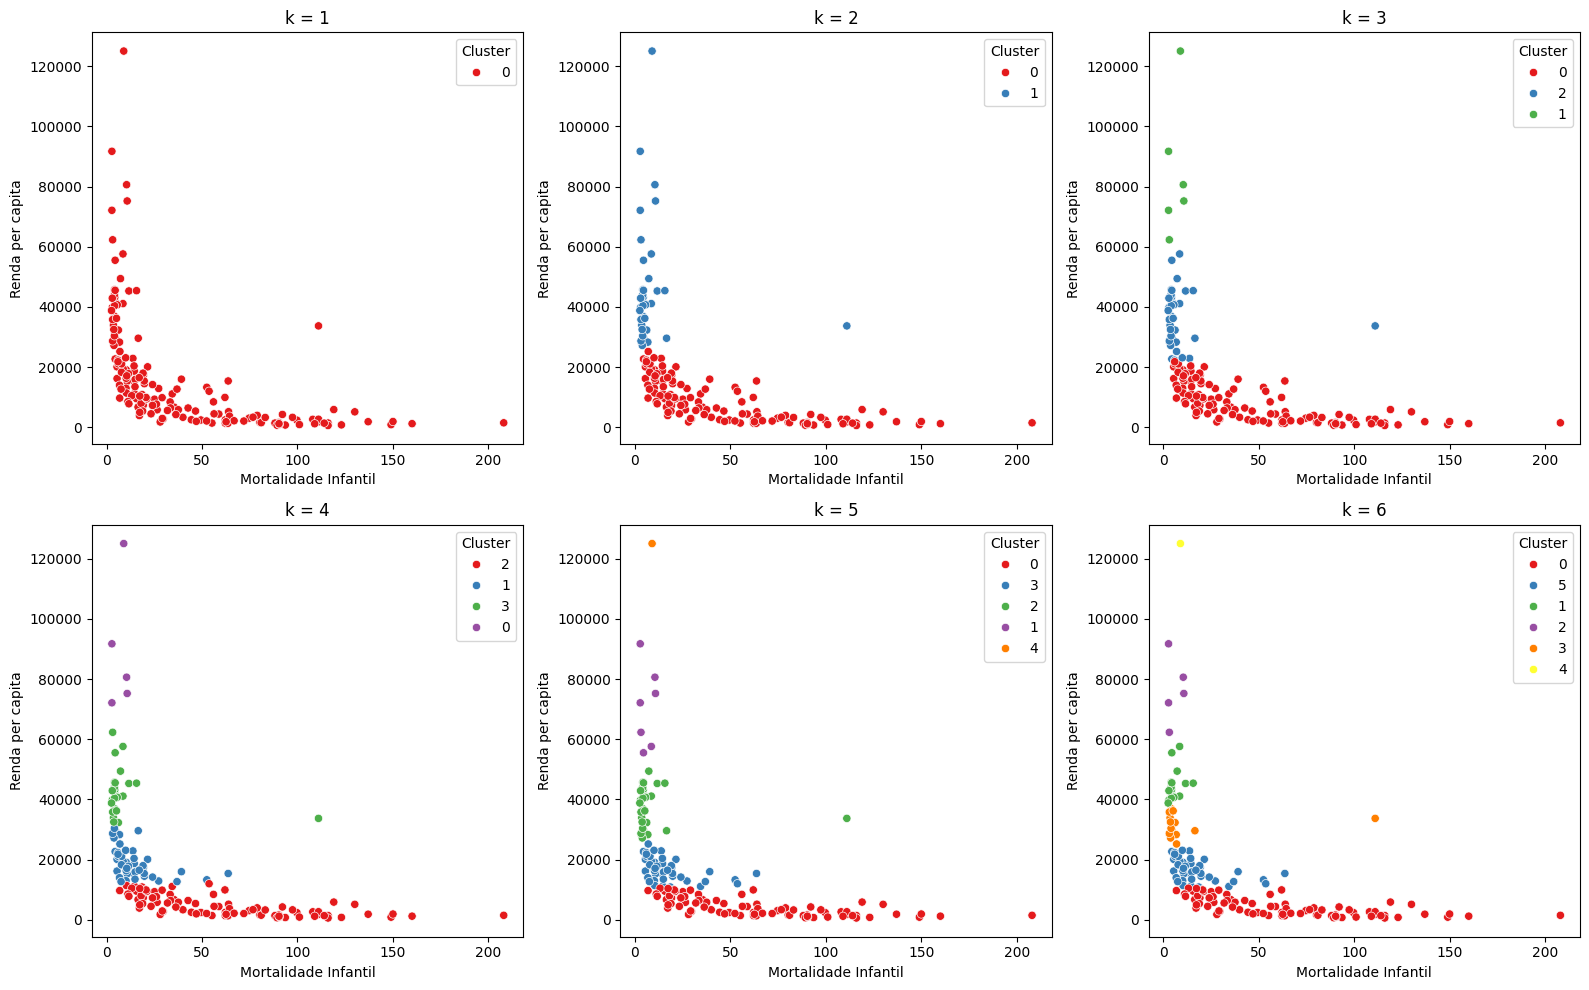

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 6

# Calculate the number of rows and columns for the grid of plots
rows = (num_clusters + 1) // 3
cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))

# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    sns.scatterplot(ax=axes[row, col], data=df, x='Mortalidade Infantil', y='Renda per capita', hue='Cluster', palette='Set1')

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])
df['Cluster'] = df['Cluster'].astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

X = df[features].copy()
cluster_labels = kmeans.predict(X)

In [ ]:
silhouette_avg = silhouette_score(X, cluster_labels)

print(f'Valor de silhoeta para K={2} : {silhouette_avg}')

Valor de silhoeta para K=2 : 0.7029390230154383


In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)

print(f'Valor do índice de Davies-Bouldin para K={2} : {davies_bouldin_avg}')

Valor do índice de Davies-Bouldin para K=2 : 0.5153826231625915


### Resultados:


*   **Nº de clusters = 2**



> Valor de silhoeta para K=2 : 0.7029390230154383

> Valor do índice de Davies-Bouldin para K=2 : 0.5153826231625915



*   **Nº de cluesters = 3**

  Valor de silhoeta para K=3 : 0.682581908712076;

  Valor do índice de Davies-Bouldin para K=3 : 0.4698401175735272

*   **Nº de clusters = 4**

  Valor de silhoeta para K=4 : 0.6256460548417885

  Valor do índice de Davies-Bouldin para K=4 : 0.47572045608486824
  
*   **Nº de clusters = 5**

  Valor de silhoeta para K=5 : 0.6194465999086212

  Valor do índice de Davies-Bouldin para K=5 : 0.4196999155065585

*   **Nº de clusters = 6**

  Valor de silhoeta para K=6 : 0.6113680782206293

  Valor do índice de Davies-Bouldin para K=6 : 0.41842851855416624









# Resultado

<Axes: xlabel='Mortalidade Infantil', ylabel='Renda per capita'>

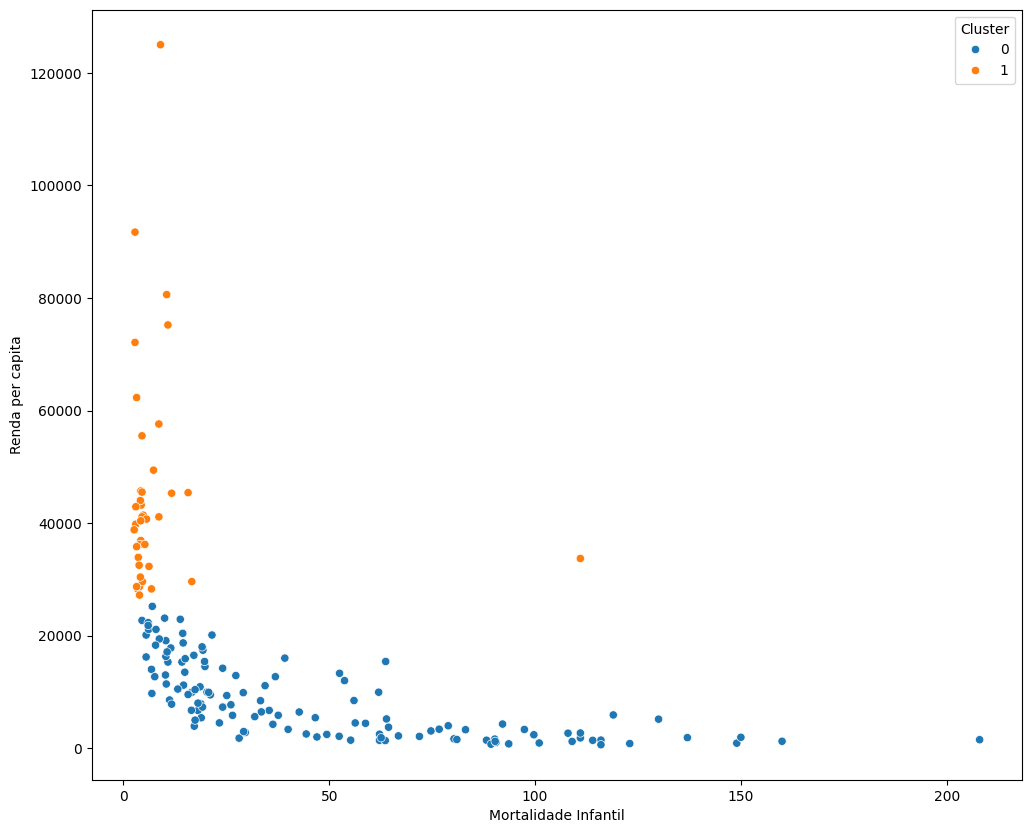

In [ ]:
plt.figure(figsize=(12, 10))

sns.scatterplot(data=df, x='Mortalidade Infantil', y='Renda per capita', hue='Cluster')

In [ ]:
import pycountry

In [ ]:
input_countries = df_country['country']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]
df_country['Codes'] = codes

In [ ]:
df_country[df_country['Codes']=='Unknown code']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Codes
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,Unknown code
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,Unknown code
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,Unknown code
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,Unknown code
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740,Unknown code
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,Unknown code
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,Unknown code
71,Iran,19.3,24.4,5.60,19.4,17400,15.900,74.5,1.76,6530,Unknown code
83,Kyrgyz Republic,29.6,51.6,6.18,81.7,2790,10.000,68.5,3.10,880,Unknown code
84,Lao,78.9,35.4,4.47,49.3,3980,9.200,63.8,3.15,1140,Unknown code


In [ ]:
df['Codes'] = df_country['Codes']

In [ ]:
# Ainda há dados sem o código. Solução: Fazer na mão
df['Codes'][125] = 'RUS'
df['Codes'][19] = 'BOL'
df['Codes'][23] = 'BRN'
df['Codes'][30] = 'CPV'
df['Codes'][37] = 'COD'
df['Codes'][38] = 'COG'
df['Codes'][40] = 'CIV'
df['Codes'][43] = 'CZE'
df['Codes'][71] = 'IRN'
df['Codes'][84] = 'LAO'
df['Codes'][101] = 'FSM'
df['Codes'][102] = 'MDA'
df['Codes'][147] = 'TZA'
df['Codes'][153] = 'TUR'
df['Codes'][164] = 'VNM'
df['Codes'][138] = 'KOR'
df['Codes'][163] = 'VEN'
df['Codes'][83] = '	KGZ'
df['Codes'][92] = 'MKD'
df['Codes'][134] = 'SVK'
df['Codes'][141] = 'VCT'



<ipython-input-182-dc5fcbea3b1e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-182-dc5fcbea3b1e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-182-dc5fcbea3b1e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-182-dc5fcbea3b1e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
graf2 = px.choropleth(df,locations='Codes',color='Cluster',color_continuous_scale='RdBu')
graf2.show()

##**CONCLUSÃO**

Através da visualização do gráfico acima, podemos ter uma visão geral dos dois grupos formados.

O cluster 1 é formando por países mais desenvolvidos como EUA, Canadá, Japão entre outras nações consideradas de primeiro mundo. Não necessitando de ajuda humanitária.

Já o cluster 2 apresenta países em desenvolvimento onde as taxas de mortalidade infantil e baixa renda per capita são problemas ainda muitos desses países da cor azul.

Obs: Pelo mapa podemos obserar que a Líbia está no cluster 1, grupo ao qual não pertence. O algorítmo não classificou esse país corretamente.